# That notebook will be used fror for verifying the tumor position in TCGA based on the BraTS segmentation.

In [1]:
import os

import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

from pathlib import Path

## Choose cancer type, patient and slice

In [2]:
brats_path = Path('../Datasets/Brats19Files/MICCAI_BraTS_2019_Data_Training/')
lgg_path = os.path.join(brats_path, 'LGG')
hgg_path = os.path.join(brats_path, 'HGG')
name_df = pd.read_csv(os.path.join(brats_path, 'name_mapping.csv'))

def plot_slice_and_seg(cancer_type, patient_ID, slice_idx):

    if cancer_type == 'LGG':
        cancer_path = lgg_path
    else:
        cancer_path = hgg_path
    
    patient_name = name_df[name_df['TCGA_TCIA_subject_ID'] == patient_ID].BraTS_2019_subject_ID.values
    
    if len(patient_name) == 0:
        print("This patient is not available in the BraTS database.")
        return
    else:
        patient_name = patient_name[0]

    # To see the tumor clearly, scans of T1 with contrast will be plotted.
    image_path = os.path.join(cancer_path, patient_name, (patient_name + '_t1ce.nii.gz'))
    img_f = nib.load(image_path)
    image_array = img_f.get_fdata()

    seg_path = os.path.join(cancer_path, patient_name, (patient_name + '_seg.nii.gz'))
    seg_f = nib.load(seg_path)
    seg_array = seg_f.get_fdata()

    fig = plt.figure(figsize=(10,5))
    fig.suptitle(f"Brain and tumor segmentation for slice {slice_idx}/{image_array.shape[-1]} from patient {patient_name}.")

    img_fig = fig.add_subplot(1,2,1)
    img_fig.imshow(image_array[:,:,slice_idx], cmap='gray')

    seg_fig = fig.add_subplot(1,2,2)
    seg_fig.imshow(seg_array[:,:,slice_idx], cmap='gray')

    plt.show()

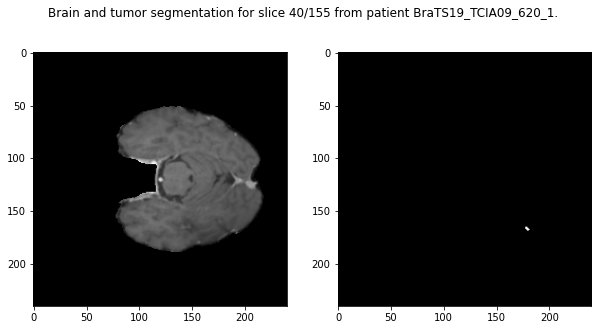

In [71]:
plot_slice_and_seg('LGG', 'TCGA-CS-6188', 40)